In [1]:
import sys
sys.path.append("..")

import dataInterpreter as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import scipy

path = "C:\\Users\\Pedro\\Documents\\BicPAMS\\bicpams_5.1\\data\\latecovid\\"
filtered_data_01 = pd.read_csv(path + 'data-p01.csv', index_col = 0, sep = '\t')

## Select columns to analyse

In [8]:
colLabels = []
i = 0

colstmp = dt.get_columns('NHBE', 'healthy')
colLabels += [i] * len(colstmp)
i += 1
cols = colstmp

colstmp = dt.get_columns('NHBE', 'sars-cov2')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp


colstmp = dt.get_columns('A549', 'healthy')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp

colstmp = dt.get_columns('A549', 'sars-cov2')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp


colstmp = dt.get_columns('Calu3', 'healthy')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp

colstmp = dt.get_columns('Calu3', 'sars-cov2')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp

In [9]:
pairs = [
    [dt.get_columns('NHBE', 'healthy', series = [1]),
     dt.get_columns('NHBE', 'sars-cov2', series = [1])],
    
    [dt.get_columns('A549', 'healthy', series = [2, 5]),
     dt.get_columns('A549', 'sars-cov2', series = [2, 5])],
    
    [dt.get_columns('Calu3', 'healthy', series = [7]),
     dt.get_columns('Calu3', 'sars-cov2', series = [7])],
    
]

data = dt.get_complete_data()[cols]
data

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series9_NHBE_Mock_1,Series9_NHBE_Mock_2,Series9_NHBE_Mock_3,Series9_NHBE_Mock_4,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,...,Series2_A549_SARS-CoV-2_3,Series5_A549_SARS-CoV-2_1,Series5_A549_SARS-CoV-2_2,Series5_A549_SARS-CoV-2_3,Series7_Calu3_Mock_1,Series7_Calu3_Mock_2,Series7_Calu3_Mock_3,Series7_Calu3_SARS-CoV-2_1,Series7_Calu3_SARS-CoV-2_2,Series7_Calu3_SARS-CoV-2_3
DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000
WASH7P,3.401197,3.218876,3.178054,4.060443,4.077537,3.988984,4.499810,3.555348,2.995732,3.806662,...,3.891820,3.663562,3.871201,4.189655,3.258097,4.110874,4.442651,3.871201,3.496508,3.737670
LOC729737,4.727388,4.787492,4.736198,4.077537,3.951244,3.806662,4.543295,4.852030,4.442651,5.602119,...,2.397895,0.693147,2.639057,1.609438,4.189655,5.220356,6.077642,5.605802,4.927254,5.583496
LOC100133331,2.995732,3.091042,3.610918,2.197225,1.945910,2.564949,2.397895,2.833213,3.178054,4.007333,...,3.610918,3.465736,3.806662,4.605170,1.609438,2.708050,3.433987,2.708050,2.564949,3.178054
LOC100288069,2.639057,2.890372,3.332205,1.386294,0.000000,0.000000,0.693147,2.995732,2.302585,3.931826,...,2.708050,2.833213,3.258097,3.806662,0.000000,0.693147,2.772589,2.484907,1.609438,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BCORP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
KDM5D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.955827,4.663439,4.828314,5.568345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TTTY10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EIF1AY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.736198,4.356709,4.317488,5.017280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
j = 0
pvalues = {}

num_rows = len(data.index)

for index, row in data.iterrows():
    i = 0
    for pair in pairs:
        col_name_1 = "p-value" + str(i) + "_1"
        col_name_2 = "p-value" + str(i) + "_2"
        
        if col_name_1 not in pvalues:
            pvalues[col_name_1] = []
            pvalues[col_name_2] = []
            
        if min(row[pair[0]]) == max(row[pair[0]]):
            pvalues[col_name_1] += [2]
        else:
            pvalues[col_name_1] += [scipy.stats.shapiro(row[pair[0]]).pvalue]
            
        if min(row[pair[1]]) == max(row[pair[1]]):
            pvalues[col_name_2] += [2]
        else:
            pvalues[col_name_2] += [scipy.stats.shapiro(row[pair[1]]).pvalue]
            
        i += 1
    
    dt.printProgressBar(j, num_rows)
    
    j += 1

ValueError: Data must be at least length 3.

In [6]:
pvalues.keys()

dict_keys(['p-value0_1', 'p-value0_2', 'p-value1_1', 'p-value1_2', 'p-value2_1', 'p-value2_2'])

In [7]:
pvalue_data = pd.DataFrame(pvalues, index = data.index)

In [8]:
pvalue_data['min0'] = pvalue_data.loc[:, ['p-value0_1', 'p-value0_2']].min(axis=1)
pvalue_data['min1'] = pvalue_data.loc[:, ['p-value1_1', 'p-value1_2']].min(axis=1)
pvalue_data['min2'] = pvalue_data.loc[:, ['p-value2_1', 'p-value2_2']].min(axis=1)

pvalue_data = pvalue_data[['p-value0_1', 'p-value0_2', 'min0', 'p-value1_1', 'p-value1_2', 'min1', 'p-value2_1', 'p-value2_2', 'min2']]
pvalue_data

,p-value0_1,p-value0_2,min0,p-value1_1,p-value1_2,min1,p-value2_1,p-value2_2,min2
DDX11L1,2.000000,2.000000,2.000000,5.044600e-07,0.001351,5.044600e-07,2.000000,-9.106917e-07,-9.106917e-07
WASH7P,0.295006,0.587333,0.295006,8.472345e-01,0.690944,6.909437e-01,0.525058,6.861168e-01,5.250584e-01
LOC729737,0.116671,0.679039,0.116671,3.497938e-02,0.147232,3.497938e-02,0.898811,5.526396e-02,5.526396e-02
LOC100133331,0.897835,0.553370,0.553370,5.425481e-01,0.072846,7.284562e-02,0.775810,4.296534e-01,4.296534e-01
LOC100288069,0.265029,0.835979,0.265029,1.685483e-02,0.572243,1.685483e-02,0.463262,3.794160e-01,3.794160e-01
...,...,...,...,...,...,...,...,...,...
BCORP1,2.000000,2.000000,2.000000,5.044600e-07,0.000021,5.044600e-07,2.000000,2.000000e+00,2.000000e+00
KDM5D,2.000000,2.000000,2.000000,5.164258e-01,0.166293,1.662934e-01,2.000000,2.000000e+00,2.000000e+00
TTTY10,2.000000,2.000000,2.000000,2.000000e+00,2.000000,2.000000e+00,2.000000,2.000000e+00,2.000000e+00
EIF1AY,2.000000,2.000000,2.000000,9.803227e-01,0.501802,5.018023e-01,2.000000,2.000000e+00,2.000000e+00


In [9]:
non_normal_NHBE = pvalue_data[(pvalue_data['min0'] < 0.05)].index
normal_NHBE = pvalue_data[(pvalue_data['min0'] >= 0.05) & (pvalue_data['min0'] <= 1)].index

non_normal_A549 = pvalue_data[(pvalue_data['min1'] < 0.05)].index
normal_A549 = pvalue_data[(pvalue_data['min1'] >= 0.05) & (pvalue_data['min1'] <= 1)].index

non_normal_Calu3 = pvalue_data[(pvalue_data['min2'] < 0.05)].index
normal_Calu3 = pvalue_data[(pvalue_data['min2'] >= 0.05) & (pvalue_data['min2'] <= 1)].index

print("Number of non-normal genes (NHBE): ", len(non_normal_NHBE))
print("Number of normal genes (NHBE): ", len(normal_NHBE), end = '\n\n')

print("Number of non-normal genes (A549): ", len(non_normal_A549))
print("Number of normal genes (A549): ", len(normal_A549), end = '\n\n')

print("Number of non-normal genes (Calu3): ", len(non_normal_Calu3))
print("Number of normal genes (Calu3): ", len(normal_Calu3), end = '\n\n')

Number of non-normal genes (NHBE):  5581
Number of normal genes (NHBE):  11418

Number of non-normal genes (A549):  8333
Number of normal genes (A549):  9738

Number of non-normal genes (Calu3):  4606
Number of normal genes (Calu3):  12212



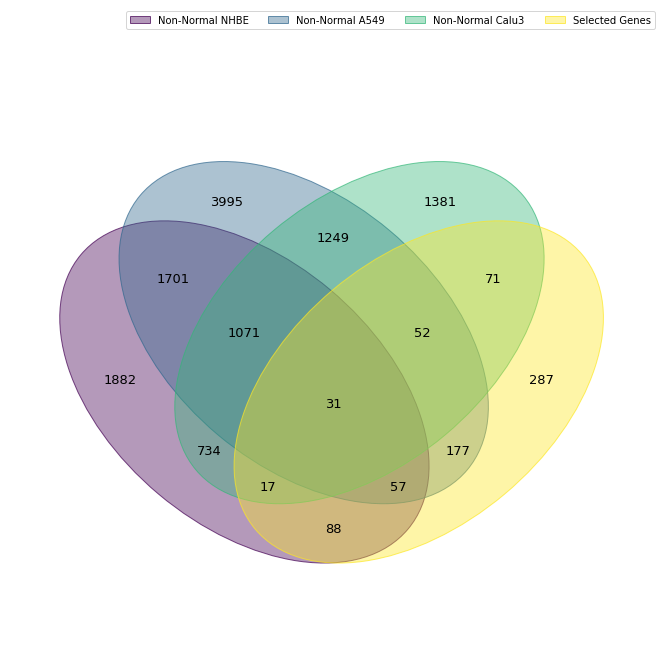

In [10]:
from venn import venn

labels = ["Non-Normal NHBE", "Non-Normal A549", "Non-Normal Calu3", "Selected Genes"]

sets = {
    "Non-Normal NHBE": set(non_normal_NHBE),
    "Non-Normal A549": set(non_normal_A549),
    "Non-Normal Calu3": set(non_normal_Calu3),
    "Non-Normal Selected Genes": set(filtered_data_01.index)
}
fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
plt.legend(labels, ncol=6)

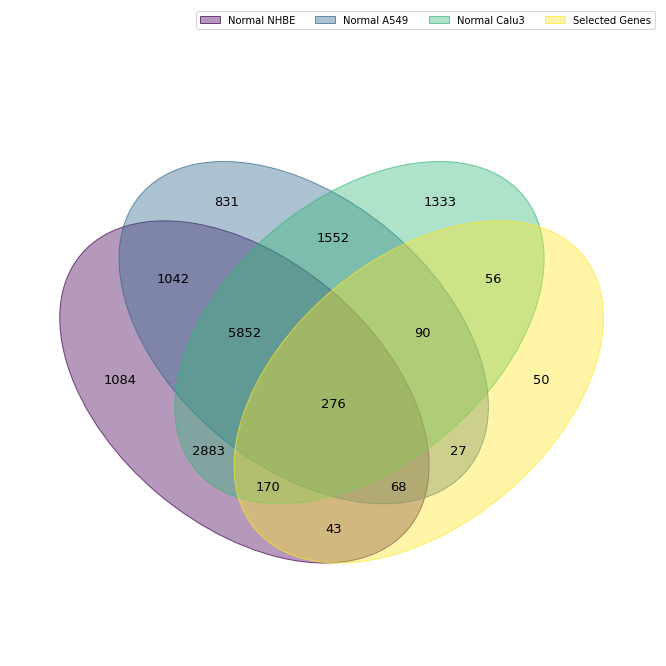

In [11]:
labels = ["Normal NHBE", "Normal A549", "Normal Calu3", "Selected Genes"]

sets = {
    "Normal NHBE": set(normal_NHBE),
    "Normal A549": set(normal_A549),
    "Normal Calu3": set(normal_Calu3),
    "Selected Genes": set(filtered_data_01.index)
}
fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
plt.legend(labels, ncol=6)

In [28]:
len(filtered_data_01.index)

780